# Exploratory Data Analysis for ICEES Multivariate Table

## Introduction

In this file, we will conduct exploratory data analysis (EDA) for Traffic Collision data collected from the Seattle City GIS database, found here [seattlecitygis](https://data-seattlecitygis.opendata.arcgis.com/datasets/collisions).

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# This is to supress the warning messages that might be generated 
import warnings
warnings.filterwarnings('ignore')

# Comment this if the data visualisations doesn't work for you
%matplotlib inline

# Using whitegrid style for our seaborn plots
sns.set_style(style = 'whitegrid')

In [2]:
# This cell is to display all output within each cell in Jupyter Notebook, instead of just the last statement

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Reading and visualizing our data

In [3]:
#Reading the original table

Collision_data = pd.read_csv('../data_sources/Collisions.csv')

In [4]:
#Viewing the data dimension

nrow, ncol = Collision_data.shape
nrow, ncol

(220338, 40)

In [5]:
#Reading the first 10 entries 

Collision_data.head(10)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.362907,47.558372,1,326120,327620,3824232,Unmatched,Block,NaN,DELRIDGE WAY SW BETWEEN SW EDMUNDS ST AND SW H...,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
1,-122.301868,47.618931,2,65200,65200,2621299,Matched,Block,NaN,E DENNY WAY BETWEEN 23RD AVE AND 24TH AVE,...,Ice,Dusk,NaN,7015014.0,NaN,32,One parked--one moving,0,0,N
2,-122.391508,47.669461,3,20100,20100,1473746,Matched,Block,NaN,NW 56TH ST BETWEEN 26TH AVE NW AND 28TH AVE NW,...,Dry,Dark - Street Lights On,NaN,4080013.0,NaN,32,One parked--one moving,0,0,N
3,-122.346296,47.620903,4,49300,49300,2072241,Matched,Intersection,28927.0,TAYLOR AVE N AND THOMAS ST,...,Dry,Daylight,NaN,6154013.0,NaN,10,Entering at angle,0,0,N
4,-122.288688,47.532714,5,29800,29800,1177964,Unmatched,Block,NaN,BEACON ER AVE S BETWEEN S PORTLAND ST AND S CH...,...,NaN,NaN,NaN,4315006.0,NaN,NaN,NaN,0,0,N
5,-122.316779,47.610979,6,1294,1294,3615286,Unmatched,Block,NaN,12TH AVE BETWEEN E MARION ST AND E SPRING ST,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
6,-122.330820,47.605483,7,326090,327590,E984256,Matched,Block,NaN,5TH AVE BETWEEN COLUMBIA ST AND MARION ST,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,12,From same direction - both going straight - on...,0,0,N
7,-122.323966,47.606374,8,32800,32800,2128498,Matched,Block,NaN,TERRY AVE BETWEEN JAMES ST AND CHERRY ST,...,Wet,Dark - No Street Lights,NaN,5356027.0,NaN,32,One parked--one moving,0,0,N
8,-122.336747,47.686304,9,1044,1044,3615241,Unmatched,Block,NaN,WALLINGFORD AVE N BETWEEN EAST GREEN LAKE DR N...,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
9,-122.367024,47.625593,10,1062,1062,3503599,Matched,Block,NaN,ELLIOTT AVE W BETWEEN W MERCER ST AND W MERCER PL,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,32,One parked--one moving,0,0,N


### About the original column variables
 
__X__ - longitude, the GPS values moving left to right (East and West) along the X axis  
__Y__ - latitude, represented by horizontal lines, which go up and down (North and South)  
__OBJECTID__ - ESRI unique identifier  
__INCKEY__ - a unique key for the incident, variable type: Long  
__COLDETKEY__ - a secondary key for the incident, variable type: Long  
__REPORTNO__ - unknown  
__STATUS__ - unknown  
__ADDRTYPE__ - Collision address location type, variable type: text, 12 VARCHAR, e.g. Alley, Block, Intersection   
__INTKEY__ - a key that corresponds to the intersection associated with a collision, variable type: Double  
__LOCATION__ - a text description of location, e.g. TERRY AVE BETWEEN JAMES ST AND CHERRY ST  
__EXCEPTRSNCODE__ - unknown  
__EXCEPTRSNDESC__ - unknown  
__SEVERITYCODE__ - a code that corresponds to the severity of the collision:  
$\,\,$ 3 — fatality  
$\,\,$ 2b — serious injury  
$\,\,$ 2 — injury  
$\,\,$ 1 — prop damage  
$\,\,$ 0 — unknown  
__SEVERITYDESC__ - a description of the collision, e.g. Property Damage Only Collision, Injury Collision   
__COLLISIONTYPE__ - a description of the collision type, e.g. Parked Car, Rear Ended, Sideswipe  
__PERSONCOUNT__ - the total number of people involved  
__PEDCOUNT__ - the total number of pedestrians involved  
__PEDCYLCOUNT__ - the total number of cyclists involved  
__VEHCOUNT__ - the total number of vehicles involved  
__INJURIES__ - the total number of injuries other than fatal or disabling at the scene, including broken fingers or toes, abrasions, etc.  
__SERIOUSINJURIES__ - total number of injuries that result in at least a temporary impairment, e.g. a broken limb. It does not mean that the collision resulted in a permanent disability  
__FATALITIES__ - includes the total number of persons who died at the scene of the collisions, were dead on arrival at the hospital, or died within 30 days of the collision from collision-related injuries  
__INCDATE__ - incident date   
__INCDTTM__ - date and time of the incident, variable type: text, 30 VARCHAR  
__JUNCTIONTYPE__ - category of the junction where the collision took place  
__SDOT_COLCODE__ - the SDOT collision code    
__SDOT_COLDESC__ - a description of the collision corresponding to the collision code  
__INATTENTIONIND__ - whether or not collision was due to inattention. (Y/N)  
__UNDERINFL__ - whether or not the driver was under the influence of alcohol or drugs  
__WEATHER__ - a description of the weather, e.g. Raining, Clear  
__ROADCOND__ - a description of the road conditions, e.g. Dry, Wet  
__LIGHTCOND__ - a description of the light conditions, e.g. Dark - No Street Lights, Daylight  
__PEDROWNOTGRNT__ - whether or not the pedestrian right of way was not granted. (Y/N)  
__SDOTCOLNUM__ - unknown  
__SPEEDING__ - whether or not the driver was speeding  
__ST_COLCODE__ - code provided by the state that describes the collision, for example: 
$\,\,$ 0 - Vehicle Going Straight Hits Pedestrian  
$\,\,$ 1 - Vehicle Turning Right Hits Pedestrian  
$\,\,$ 2 - Vehicle Turning Left Hits Pedestrian  
$\,\,$ 3 - Vehicle Backing Hits Pedestrian  
$\,\,$ 4 - Vehicle Hits Pedestrian - All Other Actions  
$\,\,$ 5 - Vehicle Hits Pedestrian - Actions Not Stated  
$\,\,$ 10 - Entering At Angle   
$\,\,$ 11 - From Same Direction - Both Going Straight - Both Moving - Sideswipe  
$\,\,$ 12 - From Same Direction - Both Going Straight - One Stopped - Sideswipe  
$\,\,$ 13 - From Same Direction - Both Going Straight - Both Moving - Rear End  
$\,\,$ ...  
__ST_COLDESC__ - a description that corresponds to the state’s coding designation    
__SEGLANEKEY__ - a key for the lane segment in which the collision occurred  
__CROSSWALKKEY__ - a key for the crosswalk at which the collision occurred  

In [14]:
#changing all the column names to lowercase or add underscores between words

Collision_data.columns = map(str.lower, Collision_data.columns)
Collision_data.head(3)

,x,y,objectid,inckey,coldetkey,reportno,status,addrtype,intkey,location,...,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar
0,-122.362907,47.558372,1,326120,327620,3824232,Unmatched,Block,NaN,DELRIDGE WAY SW BETWEEN SW EDMUNDS ST AND SW H...,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
1,-122.301868,47.618931,2,65200,65200,2621299,Matched,Block,NaN,E DENNY WAY BETWEEN 23RD AVE AND 24TH AVE,...,Ice,Dusk,NaN,7015014.0,NaN,32,One parked--one moving,0,0,N
2,-122.391508,47.669461,3,20100,20100,1473746,Matched,Block,NaN,NW 56TH ST BETWEEN 26TH AVE NW AND 28TH AVE NW,...,Dry,Dark - Street Lights On,NaN,4080013.0,NaN,32,One parked--one moving,0,0,N


In [15]:
Collision_data.dtypes

x                  float64
y                  float64
objectid             int64
inckey               int64
coldetkey            int64
reportno            object
status              object
addrtype            object
intkey             float64
location            object
exceptrsncode       object
exceptrsndesc       object
severitycode        object
severitydesc        object
collisiontype       object
personcount          int64
pedcount             int64
pedcylcount          int64
vehcount             int64
injuries             int64
seriousinjuries      int64
fatalities           int64
incdate             object
incdttm             object
junctiontype        object
sdot_colcode       float64
sdot_coldesc        object
inattentionind      object
underinfl           object
weather             object
roadcond            object
lightcond           object
pedrownotgrnt       object
sdotcolnum         float64
speeding            object
st_colcode          object
st_coldesc          object
s

In [17]:
#Basic Statistical evaluation to familiarize with the data and some quick observations
Collision_data_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in Collision_data.columns:
    tmp['column'] = [c]
    tmp['values'] = [Collision_data[c].unique()]
    tmp['values_count_incna'] = len(list(Collision_data[c].unique()))
    tmp['values_count_nona'] = int(Collision_data[c].nunique())
    tmp['num_miss'] = Collision_data[c].isnull().sum()
    tmp['pct_miss'] = (Collision_data[c].isnull().sum()/ len(Collision_data)).round(3)*100
    Collision_data_stats = Collision_data_stats.append(tmp)
    
Collision_data_stats

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,x,"[-122.3629071842, -122.30186814036999, -122.39...",24929,24928,7460,3.4
0,y,"[47.55837153875, 47.6189305718598, 47.66946128...",24929,24928,7460,3.4
0,objectid,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",220338,220338,0,0.0
0,inckey,"[326120, 65200, 20100, 49300, 29800, 1294, 326...",220338,220338,0,0.0
0,coldetkey,"[327620, 65200, 20100, 49300, 29800, 1294, 327...",220338,220338,0,0.0
0,reportno,"[3824232, 2621299, 1473746, 2072241, 1177964, ...",220335,220335,0,0.0
0,status,"[Unmatched, Matched]",2,2,0,0.0
0,addrtype,"[Block, Intersection, nan, Alley]",4,3,3706,1.7
0,intkey,"[nan, 28927.0, 29328.0, 37466.0, 26848.0, 2560...",7895,7894,148866,67.6
0,location,[DELRIDGE WAY SW BETWEEN SW EDMUNDS ST AND SW ...,25157,25156,4575,2.1


In [22]:
#This step is for cases where there might be missing values
Collision_data_stats.sort_values(by = 'pct_miss', ascending = False).head(5)

,values,values_count_incna,values_count_nona,num_miss,pct_miss
column,,,,,
pedrownotgrnt,"[nan, Y]",2,1,215161,97.7
speeding,"[nan, Y]",2,1,210468,95.5
exceptrsndesc,"[nan, Not Enough Information, or Insufficient ...",2,1,208593,94.7
inattentionind,"[nan, Y]",2,1,190151,86.3
intkey,"[nan, 28927.0, 29328.0, 37466.0, 26848.0, 2560...",7895,7894,148866,67.6


In [20]:
Collision_data_clean = Collision_data.copy()

In [30]:
#Basic Statistical evaluation to familiarize with the data and some quick observations
Collision_data_clean_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in Collision_data_clean.columns:
    tmp['column'] = [c]
    tmp['values'] = [Collision_data_clean[c].unique()]
    tmp['values_count_incna'] = len(list(Collision_data_clean[c].unique()))
    tmp['values_count_nona'] = int(Collision_data_clean[c].nunique())
    tmp['num_miss'] = Collision_data_clean[c].isnull().sum()
    tmp['pct_miss'] = (Collision_data_clean[c].isnull().sum()/ len(Collision_data_clean)).round(3)*100
    Collision_data_clean_stats = Collision_data_clean_stats.append(tmp)

In [31]:
Collision_data_clean_stats.sort_values(by = 'pct_miss', ascending = False).head(5)

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,st_coldesc,"[nan, One parked--one moving]",2,1,1,33.3
0,sdotcolnum,"[nan, 7015014.0, 4080013.0]",3,2,1,33.3
0,collisiontype,"[nan, Parked Car]",2,1,1,33.3
0,lightcond,"[nan, Dusk, Dark - Street Lights On]",3,2,1,33.3
0,roadcond,"[nan, Ice, Dry]",3,2,1,33.3


The original tablle have some (very few) rows as Y (yes) for "speeding", "inattentionind" and "pedrownotgrnt". 
Can the blanks be considered as "N"? Probably not.

In [26]:
#Dropping some more columns
#   1) Columns that are unknown: exceptrsncode, exceptrsndesc

Collision_data_clean = Collision_data_clean.drop(columns=["exceptrsncode", "exceptrsndesc"], 
                                           inplace=False).head(3)


In [29]:
#Dropping some more columns
#   1) Missing valued columns: speeding, inattentionind and pedrownotgrnt

Collision_data_clean = Collision_data_clean.drop(columns=["speeding", "inattentionind", 
                                                          "pedrownotgrnt"], 
                                           inplace=False).head(3)

Now we visualize the Frequency distribution of all the features with respect to our target feature and 
look at some plots

In [33]:
#Creating a separate dataframe which has only Categorical Variables
Collision_data_cat = Collision_data_clean.select_dtypes(include = 'object').copy()
Collision_data_cat.head(2)

,status,addrtype,location,severitycode,severitydesc,collisiontype,incdate,incdttm,junctiontype,sdot_coldesc,underinfl,weather,roadcond,lightcond,st_colcode,st_coldesc,hitparkedcar
0,Unmatched,Block,DELRIDGE WAY SW BETWEEN SW EDMUNDS ST AND SW H...,1,Property Damage Only Collision,NaN,2019/11/16 00:00:00+00,11/16/2019,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,NaN,NaN,NaN,,NaN,N
1,Matched,Block,E DENNY WAY BETWEEN 23RD AVE AND 24TH AVE,1,Property Damage Only Collision,Parked Car,2007/01/15 00:00:00+00,1/15/2007 4:25:00 PM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",0,Clear,Ice,Dusk,32,One parked--one moving,N


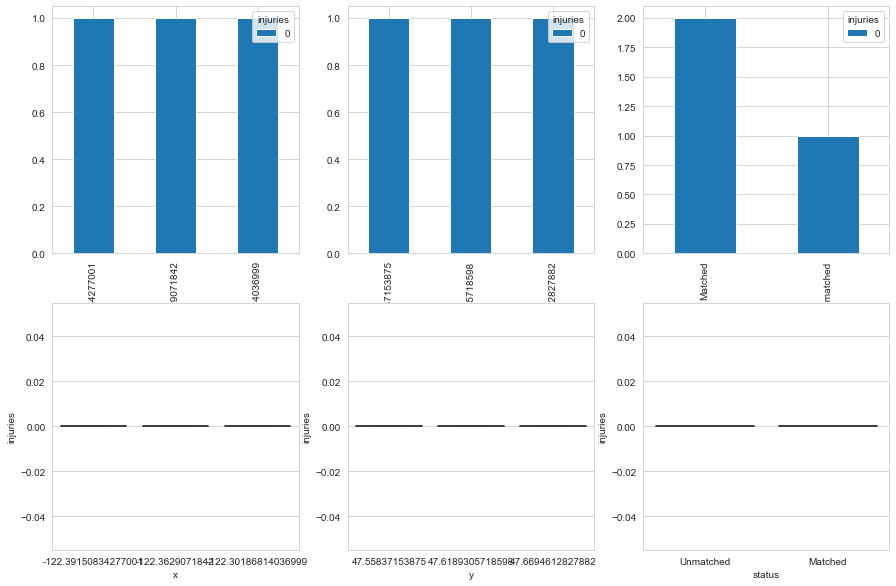

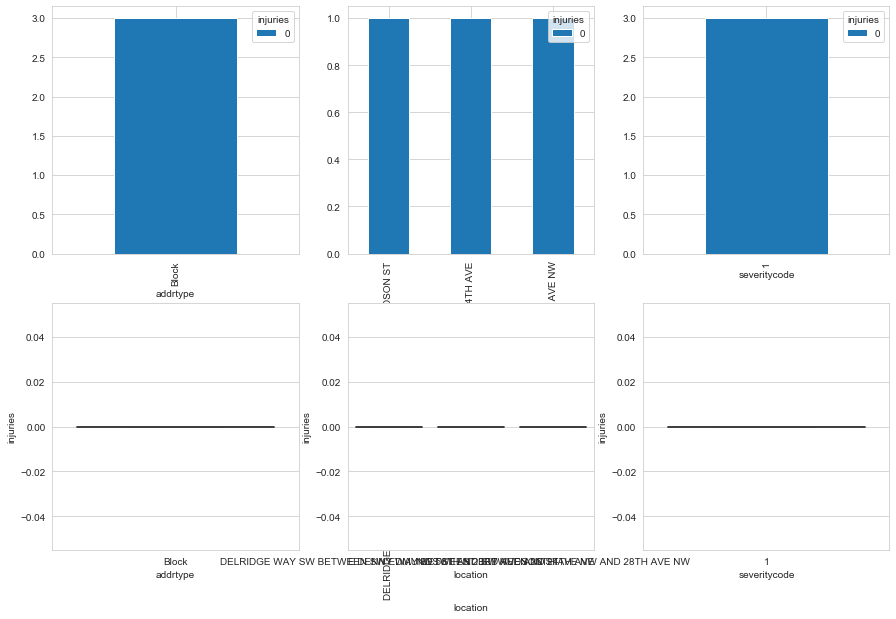

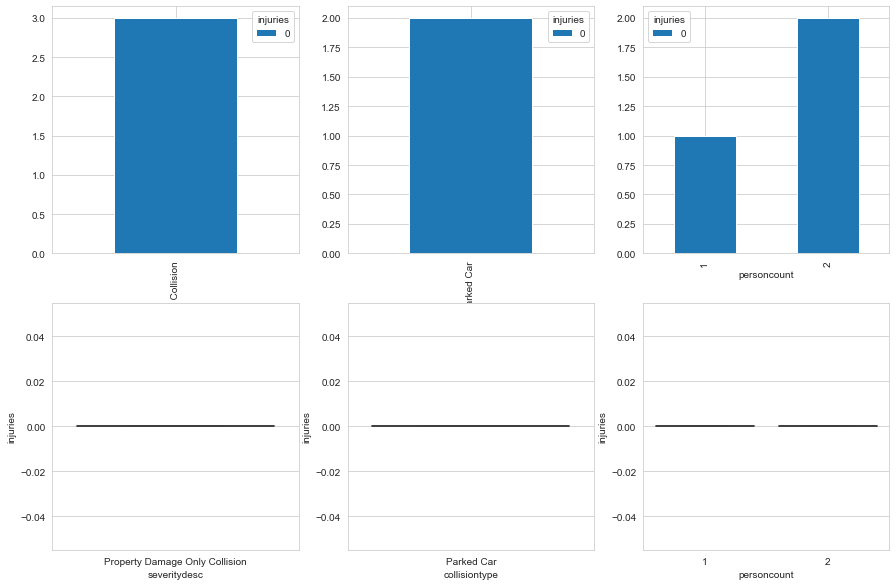

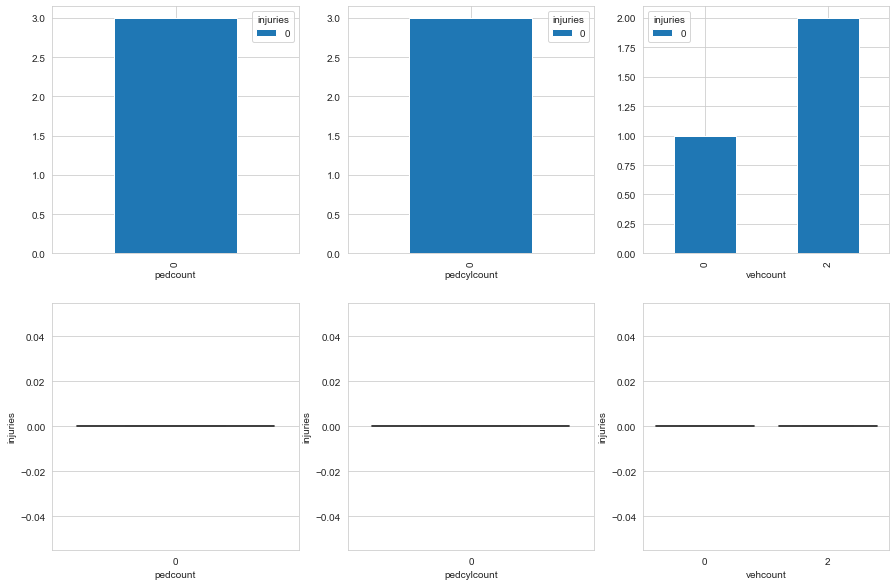

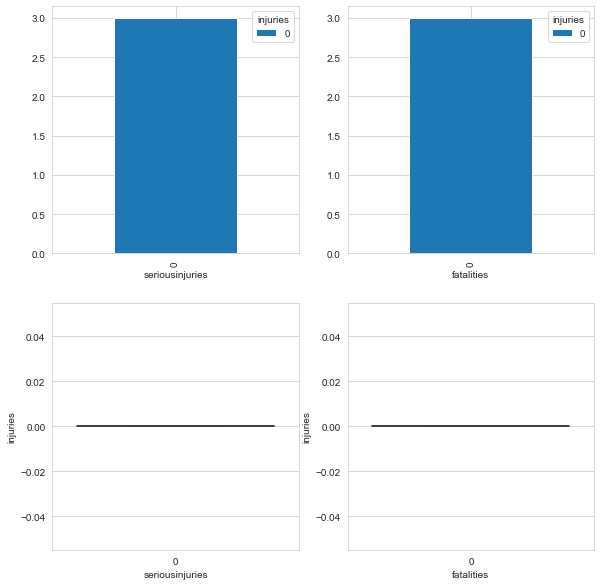

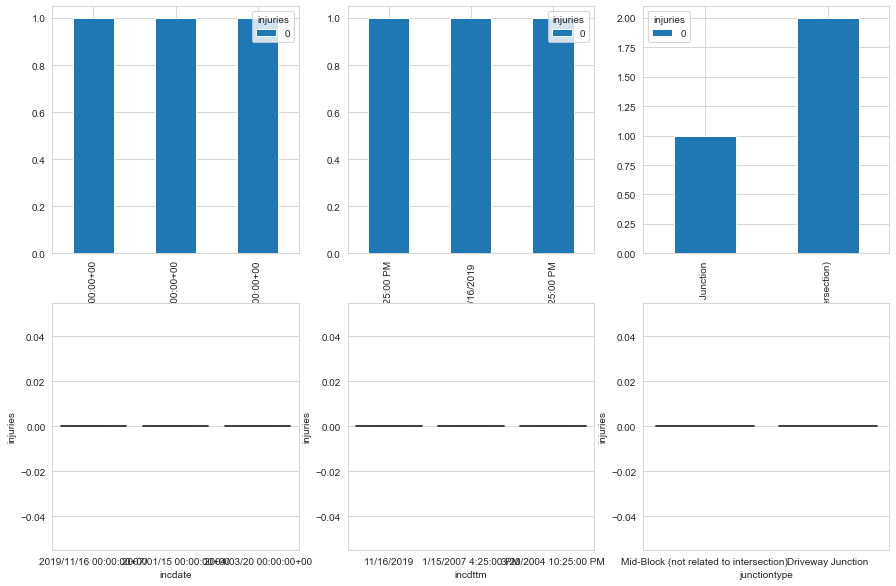

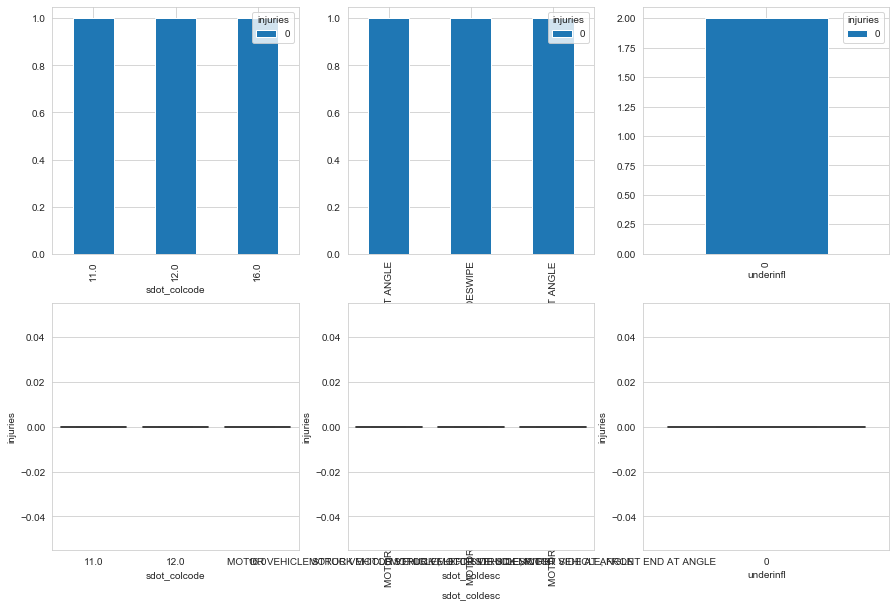

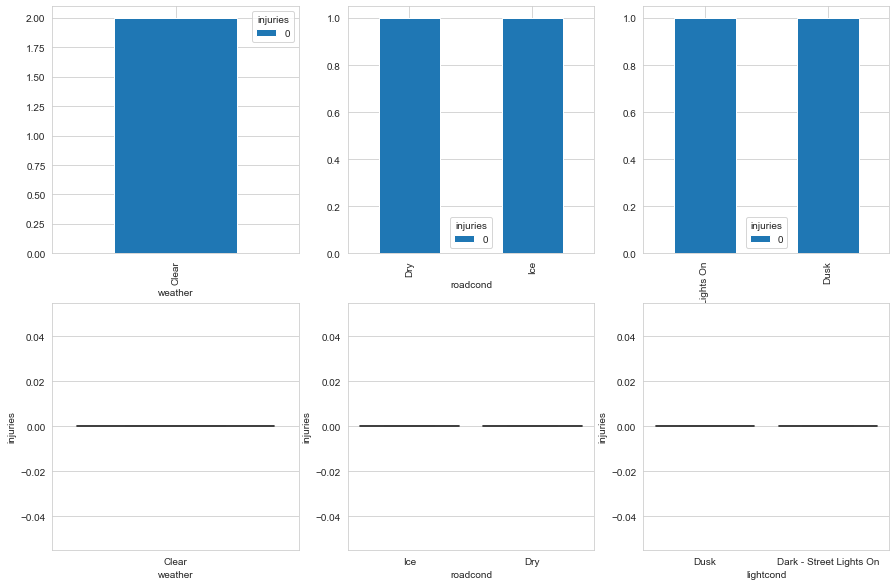

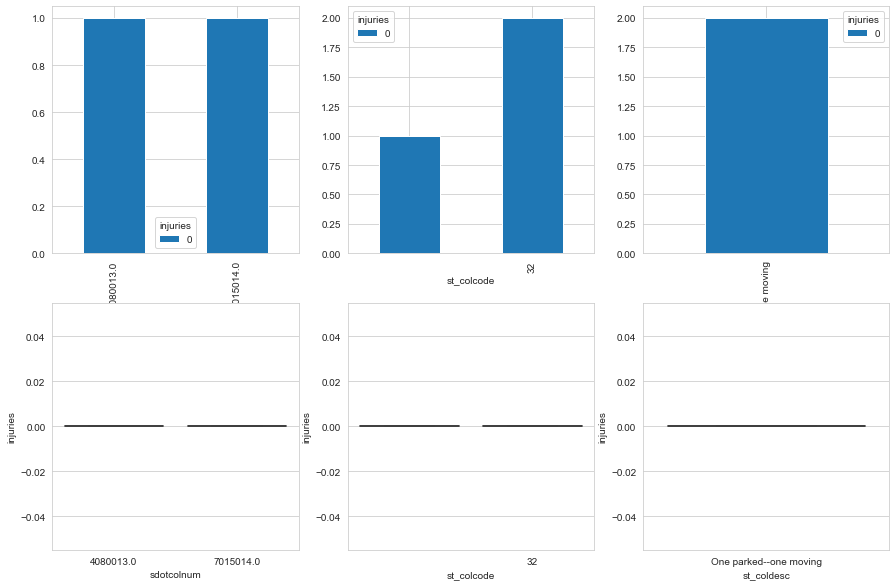

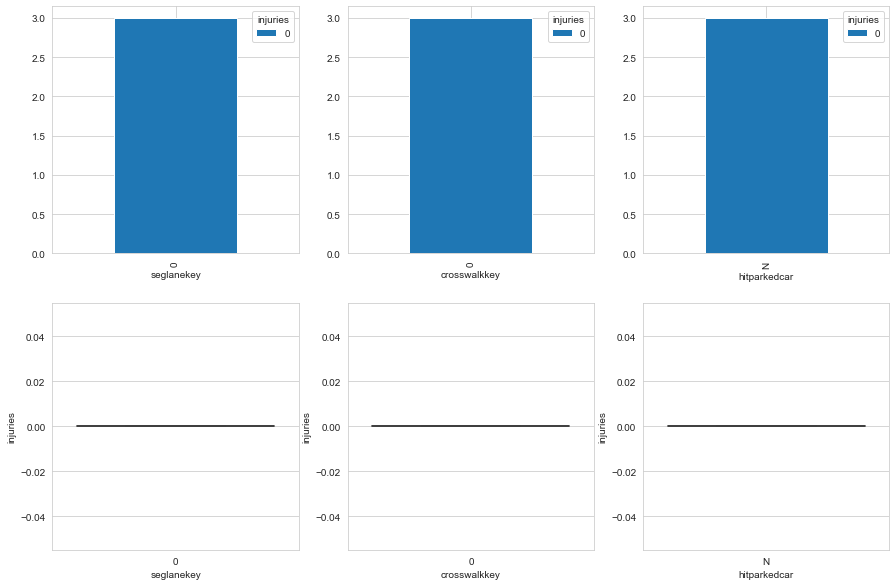

<Figure size 1080x720 with 0 Axes>

In [34]:
#multi_var_data['EDVisits'] = dataset.loc[multi_var_data.index, 'EDVisits'].copy()
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(Collision_data_clean.columns):
    if ix <= 3:
        if c != 'injuries':
            ax1 = fig.add_subplot(2,3,ix)
            Collision_data_clean.pivot_table(index=c,columns='injuries', aggfunc='size').plot.bar(stacked=True,ax=ax1)
            #sns.countplot(data = multi_var_data, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=Collision_data_clean, x=c, y='injuries', ax=ax2)
            sns.violinplot(data=Collision_data_clean, x=c, y='injuries', ax=ax2)
            #sns.swarmplot(data = ds_cat, x=c, y ='injuries', color = 'k', alpha = 0.4, ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1